# Fitting Distributions to Normally Distributed Data

This example of <i>fitdist</i> illustrates how multiple different distributions can provide a good fit to the same data set.  This is especially true for pseudo-random normally distributed data.

<p>In my experience, the normal distribution is seldom the best fitting distribution to normally distributed data.</p>

<p>My theory of why this is so, is that the other distributions that provide better fits (e.g., powerlognorm, powernorm, gamma) have shape parameters, in addition to location and scale parameters (e.g., mean and variance), and the shape parameters allow those distributions to better fit small deviations from normality in the randomly generated data.</p>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

import os, sys
import numpy as np
from scipy.stats import norm

import fitdist as fd

## Generate Normal Random Data

Generate a large data set of Standard Normal scalar observations (mean = 0,  variance = 1) and plot its normalized histogram:

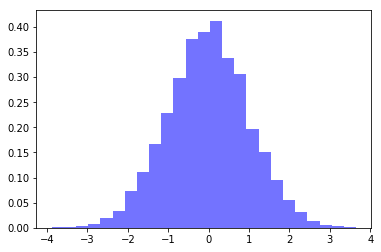

In [4]:
data = norm.rvs(size=10000)

nbins = 25

_, _, _ = plt.hist(data, nbins, density=True, facecolor='blue', alpha=0.55)

## Find the Best Fitting Continuous Distributions

The following call to fitdist examines the 18 common distributions, rather than all 90 that are available in SciPy.

In [5]:
results = fd.find_best_fit_distributions(data)

/Users/alfredreich/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/alfredreich/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/alfredreich/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5689: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/alfredreich/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5689: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/alfredreich/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/U

## Print the Results

Recall that each entry in the output list includes:

* the distribution name,
* a list of the MLE parameter estimates (in scipy.stat's defined order),
* and the Kolmogorov-Smirnov Goodness-of-Fit p-value.

In [6]:
for result in results:
    print(result)

['powerlognorm', (3.0319972593272864, 0.083606178614623952, -16.20253269390566, 17.348620339227452), 0.91849728076183834]
['exponweib', (4.0044557953181457, 5.0813216742955749, -8.8798110982768517, 7.8636572395356765), 0.87785264609728886]
['powernorm', (1.1376790052317345, 0.10140855181842676, 1.0426743001684147), 0.85598753176898645]
['t', (294.82295784250243, -0.017538117517038543, 1.000496646192945), 0.85003009451112443]
['beta', (18693878.614714976, 5914.9784339872595, -244053.54124540373, 244130.74523068959), 0.8282095361676991]
['norm', (-0.017620571683893131, 1.0039071113803162), 0.7873851585385544]
['fatiguelife', (0.0092820387459725123, -108.15779483617536, 108.13702855922344), 0.66630449690972493]
['gamma', (7481.3271635608089, -86.885613199340469, 0.011611259455723274), 0.57547261298648988]
['lognorm', (0.014245963708589521, -70.520825690792577, 70.495653307720318), 0.42788013382009993]


## Plot the #1 Result

<i><b>CAVEAT</b>: For this particular run of this notebook, the best fit distribution was the <b>powerlognorm</b> distribution.  For subsequent runs, the result might be different, so the code in the cell below will need to be adjusted accordingly.</i>

The first item in the <b><i>results</i></b> list, above, is the sublist in the 0 position (pos = 0).  The MLE parameters for the distribution identified in that sublist is the item in the 1 position (2nd item).

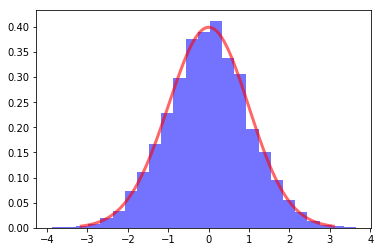

In [7]:
from scipy.stats import powerlognorm

pos = 0
mle = results[pos][1]
dist_name = "powerlognorm"  # may vary run-to-run; change code below accordingly

x = np.linspace(powerlognorm.ppf(0.001, *mle), powerlognorm.ppf(0.999, *mle), 100)

plt.plot(x, powerlognorm.pdf(x, *mle), 'r-', lw=3, alpha=0.6, label=dist_name)

_, _, _ = plt.hist(data, nbins, density=True, facecolor='blue', alpha=0.55)

## Plot the Normal Distribution's Result

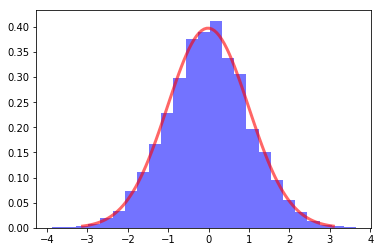

In [8]:
pos = 5
mle = results[pos][1]
dist_name = "norm"

x = np.linspace(norm.ppf(0.001, *mle), norm.ppf(0.999, *mle), 100)

plt.plot(x, norm.pdf(x, *mle), 'r-', lw=3, alpha=0.6, label=dist_name)

_, _, _ = plt.hist(data, nbins, density=True, facecolor='blue', alpha=0.55)